# Feature Engineering and Analysis of Lending Club Data

In [91]:
import pandas as pd
import numpy as np
import seaborn
from scipy.stats import chisquare
from sklearn.decomposition import PCA
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [73]:
validated_dataframe = pd.read_csv("LoanStats_Validated.csv",sep=',')

In [74]:
validated_dataframe.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,file_name,time_stamp
0,10119623,11971241.0,12000.0,12000.0,12000.0,36,11.99,398.52,B,B3,...,100.0,1.0,0.0,0.0,365874.0,44327.0,10700.0,57674.0,/LoanStats3b,2017-04-05 12:34:57
1,10224583,12086734.0,11100.0,11100.0,11100.0,36,14.98,384.68,C,C3,...,75.0,50.0,0.0,0.0,385000.0,6619.0,4000.0,0.0,/LoanStats3b,2017-04-05 12:34:57
2,10159584,12011200.0,9750.0,9750.0,9750.0,36,13.98,333.14,C,C1,...,100.0,66.7,0.0,0.0,21314.0,14123.0,7200.0,6214.0,/LoanStats3b,2017-04-05 12:34:57
3,10139658,11991209.0,12000.0,12000.0,12000.0,36,13.53,407.40,B,B5,...,81.2,33.3,0.0,0.0,18130.0,13605.0,7000.0,10030.0,/LoanStats3b,2017-04-05 12:34:57
4,10149566,12001108.0,8000.0,8000.0,8000.0,36,10.99,261.88,B,B2,...,100.0,75.0,1.0,0.0,33226.0,15949.0,8200.0,12426.0,/LoanStats3b,2017-04-05 12:34:57


In [75]:
not_validated_dataframe = pd.read_csv("Combined_data_file.csv",sep=',')

C:\Users\sweta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,19,47,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [76]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns

## Null Column Analysis

In [77]:
dataframe_1 = missing_values_table(validated_dataframe)
dataframe_2 = missing_values_table(not_validated_dataframe)
frames = [dataframe_1,dataframe_2]
null_analysis_dataframe = pd.concat(frames, axis=1)

In [78]:
pd.set_option('display.max_rows',113)
null_analysis_dataframe

,Missing Values,% of Total Values,Missing Values,% of Total Values
id,0,0.0,0,0.000000
member_id,0,0.0,3,0.000227
loan_amnt,0,0.0,3,0.000227
funded_amnt,0,0.0,3,0.000227
funded_amnt_inv,0,0.0,3,0.000227
term,0,0.0,3,0.000227
int_rate,0,0.0,3,0.000227
installment,0,0.0,3,0.000227
grade,0,0.0,3,0.000227
sub_grade,0,0.0,3,0.000227


In [79]:
#Drop all columns with 65% nulls present in the files
remove_columns_df = pd.DataFrame()
def remove_column_fromdf(df):
    remove_columns_df = df.drop(['total_bal_il','il_util','open_rv_12m','mths_since_recent_revol_delinq','mths_since_recent_bc_dlq','open_acc_6m','open_il_6m','open_il_12m','open_il_12m','open_il_24m','mths_since_rcnt_il','desc','mths_since_last_record','mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint'], axis =1)
    remove_columns_df = remove_columns_df.drop(['url','file_name','time_stamp','id','title','grade','emp_title','zip_code'], axis =1)
    return remove_columns_df

In [80]:
new_df = remove_column_fromdf(validated_dataframe)
pd.set_option('display.max_columns', None)
new_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,11971241.0,12000.0,12000.0,12000.0,36,11.99,398.52,B3,10+ years,MORTGAGE,130000.0,Source Verified,Dec-2013,Fully Paid,n,debt_consolidation,CO,13.03,0.0,Nov-1997,1.0,0.0,9.0,0.0,10805.0,67.0,19.0,f,0.0,0.0,14346.479050,14346.48,12000.00,2346.48,0.0,0.00,0.0000,Jan-2017,398.28,Unknown,Mar-2017,0.0,1.0,INDIVIDUAL,0.0,0.0,327264.0,0.0,0.0,0.0,16200.0,0.0,0.0,0.0,4.0,36362.0,3567.0,93.0,0.0,0.0,173.0,193.0,4.0,4.0,3.0,85.0,4.0,0.0,3.0,5.0,4.0,4.0,8.0,5.0,8.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,1.0,0.0,0.0,365874.0,44327.0,10700.0,57674.0
1,12086734.0,11100.0,11100.0,11100.0,36,14.98,384.68,C3,10+ years,MORTGAGE,90000.0,Not Verified,Dec-2013,Fully Paid,n,other,NY,3.73,1.0,Jun-2001,0.0,16.0,9.0,0.0,6619.0,66.2,12.0,f,0.0,0.0,13575.640006,13575.64,11100.00,2475.64,0.0,0.00,0.0000,Feb-2016,4343.32,Unknown,Aug-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,353402.0,0.0,0.0,0.0,10000.0,0.0,0.0,0.0,2.0,39267.0,1016.0,74.6,0.0,0.0,0.0,150.0,11.0,11.0,1.0,11.0,11.0,1.0,4.0,8.0,4.0,4.0,0.0,8.0,11.0,8.0,9.0,0.0,0.0,1.0,1.0,75.0,50.0,0.0,0.0,385000.0,6619.0,4000.0,0.0
2,12011200.0,9750.0,9750.0,9750.0,36,13.98,333.14,C1,1 year,RENT,26000.0,Not Verified,Dec-2013,Fully Paid,n,debt_consolidation,CA,25.12,0.0,Jan-2007,0.0,34.5,12.0,0.0,7967.0,52.8,28.0,f,0.0,0.0,11989.980005,11989.98,9750.00,2239.98,0.0,0.00,0.0000,Dec-2016,663.22,Unknown,Mar-2017,0.0,1.0,INDIVIDUAL,0.0,0.0,14123.0,0.0,0.0,0.0,15100.0,0.0,0.0,0.0,2.0,1177.0,1752.0,75.7,0.0,0.0,67.0,83.0,12.0,12.0,0.0,12.0,20.0,0.0,6.0,7.0,6.0,11.0,8.0,9.0,20.0,7.0,12.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,21314.0,14123.0,7200.0,6214.0
3,11991209.0,12000.0,12000.0,12000.0,36,13.53,407.40,B5,10+ years,RENT,40000.0,Source Verified,Dec-2013,Fully Paid,n,debt_consolidation,NM,16.94,0.0,Oct-1998,0.0,53.0,7.0,2.0,5572.0,68.8,32.0,w,0.0,0.0,13359.776858,13359.78,12000.00,1359.78,0.0,0.00,0.0000,Sep-2015,119.17,Unknown,Mar-2017,0.0,1.0,INDIVIDUAL,0.0,15386.0,13605.0,0.0,0.0,0.0,8100.0,0.0,0.0,0.0,4.0,2268.0,1428.0,79.6,0.0,0.0,124.0,182.0,1.0,1.0,0.0,11.0,17.0,6.0,2.0,2.0,3.0,14.0,8.0,6.0,24.0,2.0,7.0,0.0,0.0,0.0,2.0,81.2,33.3,0.0,0.0,18130.0,13605.0,7000.0,10030.0
4,12001108.0,8000.0,8000.0,8000.0,36,10.99,261.88,B2,2 years,MORTGAGE,33000.0,Not Verified,Dec-2013,Charged Off,n,debt_consolidation,CO,15.75,0.0,Jul-1991,1.0,44.6,9.0,1.0,7203.0,34.6,16.0,f,0.0,0.0,5622.500000,5622.50,3854.81,1120.22,15.0,632.47,113.7204,Oct-2015,276.88,Unknown,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,15949.0,0.0,0.0,0.0,20800.0,0.0,0.0,0.0,2.0,1772.0,2255.0,72.5,0.0,0.0,129.0,269.0,14.0,14.0,0.0,18.0,6.0,0.0,3.0,5.0,4.0,7.0,2.0,8.0,14.0,5.0,9.0,0.0,0.0,0.0,0.0,100.0,75.0,1.0,0.0,33226.0,15949.0,8200.0,12426.0


## Create Derived Column

In [81]:
validated_dataframe['diff_of_fundedAmount_fundedAmount_Inv'] = validated_dataframe['funded_amnt'] - validated_dataframe['funded_amnt_inv']

### Distribution of Funded Amount

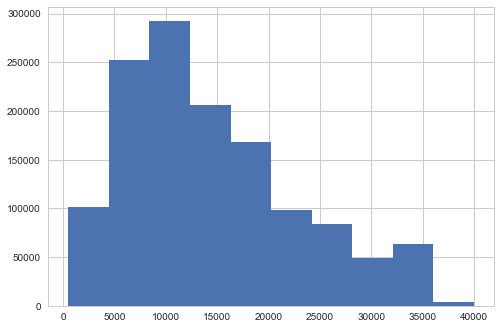

In [82]:
plt.hist(validated_dataframe.funded_amnt)
plt.show()

### Distribution of Funded Amount By Investor

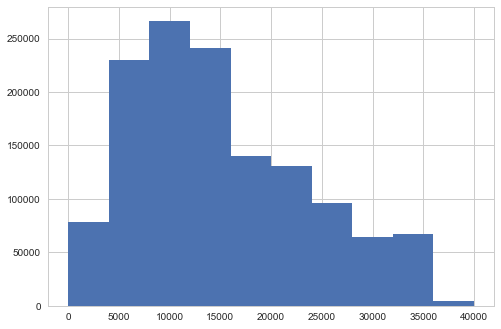

In [83]:
plt.hist(validated_dataframe.funded_amnt_inv)
plt.show()

### Difference between Funded Amount and Funded Amount By Investor

Maximum Difference 32474.9960805


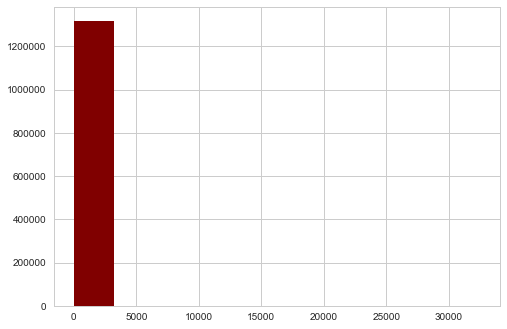

In [84]:
print ('Maximum Difference',max(validated_dataframe.diff_of_fundedAmount_fundedAmount_Inv))
plt.hist(validated_dataframe.diff_of_fundedAmount_fundedAmount_Inv,color='maroon')
plt.show()

### Grade-wise Analysis of the Difference between Funded Amount and Funded Amount By Investor

In [ ]:
seaborn.set_style("whitegrid")
plt.figure(figsize=(10, 10))
bp = seaborn.barplot(validated_dataframe.grade,validated_dataframe.diff_of_fundedAmount_fundedAmount_Inv)
bp.set_xlabel('') 
bp.set_ylabel('')
plt.show()

## Factorize the Categorical Columns

In [85]:
def factorize_columns(df):
    df['sub_grade_category'] = pd.factorize(df.sub_grade)[0]
    df['sub_grade_category'] = df['sub_grade_category'].astype('category')
    df['emp_length_category'] = pd.factorize(df.emp_length)[0]
    df['emp_length_category'] = df['emp_length_category'].astype('category')
    df['home_ownership_category'] =  pd.factorize(df.home_ownership)[0]
    df['home_ownership_category'] = df['home_ownership_category'].astype('category')
    df['Loan_status_category'] = pd.factorize(df.loan_status)[0]
    df['Loan_status_category'] = df['Loan_status_category'].astype('category')
    df['addr_state_category'] = pd.factorize(df.addr_state)[0]
    df['addr_state_category'] = df['addr_state_category'].astype('category')
    df['loan_purpose_category'] = pd.factorize(df.purpose)[0]
    df['loan_purpose_category'] = df['loan_purpose_category'].astype('category')
    df['verification_status_category'] = pd.factorize(df.verification_status)[0] 
    df['verification_status_category'] = df['verification_status_category'].astype('category')
    df['application_type_category'] = pd.factorize(df.application_type)[0]
    df['application_type_category'] = df['application_type_category'].astype('category')
    df['policy_code'] = df['policy_code'].astype('category')
    df['term'] = pd.factorize(df.term)[0]
    df['term'] = df['term'].astype('category')
    return df

In [87]:
factorize_columns(new_df).head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,sub_grade_category,emp_length_category,home_ownership_category,Loan_status_category,addr_state_category,loan_purpose_category,verification_status_category,application_type_category
0,11971241.0,12000.0,12000.0,12000.0,0,11.99,398.52,B3,10+ years,MORTGAGE,130000.0,Source Verified,Dec-2013,Fully Paid,n,debt_consolidation,CO,13.03,0.0,Nov-1997,1.0,0.0,9.0,0.0,10805.0,67.0,19.0,f,0.0,0.0,14346.479050,14346.48,12000.00,2346.48,0.0,0.00,0.0000,Jan-2017,398.28,Unknown,Mar-2017,0.0,1.0,INDIVIDUAL,0.0,0.0,327264.0,0.0,0.0,0.0,16200.0,0.0,0.0,0.0,4.0,36362.0,3567.0,93.0,0.0,0.0,173.0,193.0,4.0,4.0,3.0,85.0,4.0,0.0,3.0,5.0,4.0,4.0,8.0,5.0,8.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,1.0,0.0,0.0,365874.0,44327.0,10700.0,57674.0,0,0,0,0,0,0,0,0
1,12086734.0,11100.0,11100.0,11100.0,0,14.98,384.68,C3,10+ years,MORTGAGE,90000.0,Not Verified,Dec-2013,Fully Paid,n,other,NY,3.73,1.0,Jun-2001,0.0,16.0,9.0,0.0,6619.0,66.2,12.0,f,0.0,0.0,13575.640006,13575.64,11100.00,2475.64,0.0,0.00,0.0000,Feb-2016,4343.32,Unknown,Aug-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,353402.0,0.0,0.0,0.0,10000.0,0.0,0.0,0.0,2.0,39267.0,1016.0,74.6,0.0,0.0,0.0,150.0,11.0,11.0,1.0,11.0,11.0,1.0,4.0,8.0,4.0,4.0,0.0,8.0,11.0,8.0,9.0,0.0,0.0,1.0,1.0,75.0,50.0,0.0,0.0,385000.0,6619.0,4000.0,0.0,1,0,0,0,1,1,1,0
2,12011200.0,9750.0,9750.0,9750.0,0,13.98,333.14,C1,1 year,RENT,26000.0,Not Verified,Dec-2013,Fully Paid,n,debt_consolidation,CA,25.12,0.0,Jan-2007,0.0,34.5,12.0,0.0,7967.0,52.8,28.0,f,0.0,0.0,11989.980005,11989.98,9750.00,2239.98,0.0,0.00,0.0000,Dec-2016,663.22,Unknown,Mar-2017,0.0,1.0,INDIVIDUAL,0.0,0.0,14123.0,0.0,0.0,0.0,15100.0,0.0,0.0,0.0,2.0,1177.0,1752.0,75.7,0.0,0.0,67.0,83.0,12.0,12.0,0.0,12.0,20.0,0.0,6.0,7.0,6.0,11.0,8.0,9.0,20.0,7.0,12.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,21314.0,14123.0,7200.0,6214.0,2,1,1,0,2,0,1,0
3,11991209.0,12000.0,12000.0,12000.0,0,13.53,407.40,B5,10+ years,RENT,40000.0,Source Verified,Dec-2013,Fully Paid,n,debt_consolidation,NM,16.94,0.0,Oct-1998,0.0,53.0,7.0,2.0,5572.0,68.8,32.0,w,0.0,0.0,13359.776858,13359.78,12000.00,1359.78,0.0,0.00,0.0000,Sep-2015,119.17,Unknown,Mar-2017,0.0,1.0,INDIVIDUAL,0.0,15386.0,13605.0,0.0,0.0,0.0,8100.0,0.0,0.0,0.0,4.0,2268.0,1428.0,79.6,0.0,0.0,124.0,182.0,1.0,1.0,0.0,11.0,17.0,6.0,2.0,2.0,3.0,14.0,8.0,6.0,24.0,2.0,7.0,0.0,0.0,0.0,2.0,81.2,33.3,0.0,0.0,18130.0,13605.0,7000.0,10030.0,3,0,1,0,3,0,0,0
4,12001108.0,8000.0,8000.0,8000.0,0,10.99,261.88,B2,2 years,MORTGAGE,33000.0,Not Verified,Dec-2013,Charged Off,n,debt_consolidation,CO,15.75,0.0,Jul-1991,1.0,44.6,9.0,1.0,7203.0,34.6,16.0,f,0.0,0.0,5622.500000,5622.50,3854.81,1120.22,15.0,632.47,113.7204,Oct-2015,276.88,Unknown,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,15949.0,0.0,0.0,0.0,20800.0,0.0,0.0,0.0,2.0,1772.0,2255.0,72.5,0.0

In [96]:
Numeric_columns = list(new_df.select_dtypes(include=['float64','int64']).columns)
object_columns = list(new_df.select_dtypes(include=['object']).columns)
category_columns = list(new_df.select_dtypes(include=['category']).columns)
object_columns

['sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

## Normalize Categorical Columns

In [89]:
def normalize_columns(df):
    df['loan_amnt_normalize'] = preprocessing.normalize(df.loan_amnt)[0]
    df['funded_amnt_inv_normalize'] = preprocessing.normalize(df.funded_amnt_inv)[0]
    df['annual_inc_normalize'] = preprocessing.normalize(df.annual_inc)[0]
    df['dti_normalize'] = preprocessing.normalize(df.loan_amnt)[0]
    df['total_pymnt_normalize'] = preprocessing.normalize(df.total_pymnt)[0]
    df['total_pymnt_inv_normalize'] = preprocessing.normalize(df.total_pymnt_inv)[0]
    df['total_acc_normalize'] = preprocessing.normalize(df.total_acc)[0]
    df[]
    return df

In [92]:
normalize_columns(new_df).head()

C:\Users\sweta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\sweta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\sweta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,sub_grade_category,emp_length_category,home_ownership_category,Loan_status_category,addr_state_category,loan_purpose_category,verification_status_category,application_type_category,loan_amnt_normalize,funded_amnt_inv_normalize,annual_inc_normalize,dti_normalize,total_pymnt_normalize,total_pymnt_inv_normalize,total_acc_normalize
0,11971241.0,12000.0,12000.0,12000.0,0,11.99,398.52,B3,10+ years,MORTGAGE,130000.0,Source Verified,Dec-2013,Fully Paid,n,debt_consolidation,CO,13.03,0.0,Nov-1997,1.0,0.0,9.0,0.0,10805.0,67.0,19.0,f,0.0,0.0,14346.479050,14346.48,12000.00,2346.48,0.0,0.00,0.0000,Jan-2017,398.28,Unknown,Mar-2017,0.0,1.0,INDIVIDUAL,0.0,0.0,327264.0,0.0,0.0,0.0,16200.0,0.0,0.0,0.0,4.0,36362.0,3567.0,93.0,0.0,0.0,173.0,193.0,4.0,4.0,3.0,85.0,4.0,0.0,3.0,5.0,4.0,4.0,8.0,5.0,8.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,1.0,0.0,0.0,365874.0,44327.0,10700.0,57674.0,0,0,0,0,0,0,0,0,0.000611,0.000612,0.001098,0.000611,0.000940,0.000941,0.000597
1,12086734.0,11100.0,11100.0,11100.0,0,14.98,384.68,C3,10+ years,MORTGAGE,90000.0,Not Verified,Dec-2013,Fully Paid,n,other,NY,3.73,1.0,Jun-2001,0.0,16.0,9.0,0.0,6619.0,66.2,12.0,f,0.0,0.0,13575.640006,13575.64,11100.00,2475.64,0.0,0.00,0.0000,Feb-2016,4343.32,Unknown,Aug-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,353402.0,0.0,0.0,0.0,10000.0,0.0,0.0,0.0,2.0,39267.0,1016.0,74.6,0.0,0.0,0.0,150.0,11.0,11.0,1.0,11.0,11.0,1.0,4.0,8.0,4.0,4.0,0.0,8.0,11.0,8.0,9.0,0.0,0.0,1.0,1.0,75.0,50.0,0.0,0.0,385000.0,6619.0,4000.0,0.0,1,0,0,0,1,1,1,0,0.000565,0.000566,0.000760,0.000565,0.000889,0.000891,0.000377
2,12011200.0,9750.0,9750.0,9750.0,0,13.98,333.14,C1,1 year,RENT,26000.0,Not Verified,Dec-2013,Fully Paid,n,debt_consolidation,CA,25.12,0.0,Jan-2007,0.0,34.5,12.0,0.0,7967.0,52.8,28.0,f,0.0,0.0,11989.980005,11989.98,9750.00,2239.98,0.0,0.00,0.0000,Dec-2016,663.22,Unknown,Mar-2017,0.0,1.0,INDIVIDUAL,0.0,0.0,14123.0,0.0,0.0,0.0,15100.0,0.0,0.0,0.0,2.0,1177.0,1752.0,75.7,0.0,0.0,67.0,83.0,12.0,12.0,0.0,12.0,20.0,0.0,6.0,7.0,6.0,11.0,8.0,9.0,20.0,7.0,12.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,21314.0,14123.0,7200.0,6214.0,2,1,1,0,2,0,1,0,0.000497,0.000497,0.000220,0.000497,0.000785,0.000787,0.000880
3,11991209.0,12000.0,12000.0,12000.0,0,13.53,407.40,B5,10+ years,RENT,40000.0,Source Verified,Dec-2013,Fully Paid,n,debt_consolidation,NM,16.94,0.0,Oct-1998,0.0,53.0,7.0,2.0,5572.0,68.8,32.0,w,0.0,0.0,13359.776858,13359.78,12000.00,1359.78,0.0,0.00,0.0000,Sep-2015,119.17,Unknown,Mar-2017,0.0,1.0,INDIVIDUAL,0.0,15386.0,13605.0,0.0,0.0,0.0,8100.0,0.0,0.0,0.0,4.0,2268.0,1428.0,79.6,0.0,0.0,124.0,182.0,1.0,1.0,0.0,11.0,17.0,6.0,2.0,2.0,3.0,14.0,8.0,6.0,24.0,2.0,7.0,0.0,0.0,0.0,2.0,81.2,33.3,0.0,0.0,18130.0,13605.0,7000.0,10030.0,3,0,1,0,3,0,0,0,0.000611,0.000612,0.000338,0.000611,0.00087

## Correlation Matrix

In [93]:
Numeric_Column_DF = new_df[Numeric_columns]
cor = Numeric_Column_DF.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

funded_amnt                 loan_amnt                0.999542
funded_amnt_inv             loan_amnt                0.998505
                            funded_amnt              0.999057
installment                 loan_amnt                0.946517
                            funded_amnt              0.947169
                            funded_amnt_inv          0.946071
total_acc                   open_acc                 0.703682
out_prncp_inv               out_prncp                0.999997
total_pymnt                 loan_amnt                0.631345
                            funded_amnt              0.630899
                            funded_amnt_inv          0.629154
                            installment              0.633339
total_pymnt_inv             loan_amnt                0.631581
                            funded_amnt              0.631234
                            funded_amnt_inv          0.631296
                            installment              0.633536
        

In [94]:
cor.unstack()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
member_id,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
loan_amnt,0.021628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
funded_amnt,0.023235,0.999542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
funded_amnt_inv,0.026417,0.998505,0.999057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
int_rate,-0.073127,0.142842,0.142930,0.143069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0